# Data Mining Homework 3
## Question 4
### Mohammad Bahrami - 9724133

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Preprocessing

### Part a

In [2]:
dataset = pd.read_csv('forestfires.csv')
dataset = pd.get_dummies(dataset)
dataset

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,month_nov,month_oct,month_sep,day_fri,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed
0,7,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,1,0,0,0,0,0,0
1,7,4,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,1,0,0,0,0,0,0,1,0
2,7,4,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,1,0,0,0,1,0,0,0,0
3,8,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,1,0,0,0,0,0,0
4,8,6,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,1,0,0,0
513,2,4,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,1,0,0,0
514,7,4,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,1,0,0,0
515,1,4,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,1,0,0,0,0


### Part b

In [3]:
dataset.isna().sum().sum()
#No Missing Values

0

### Part c

In [4]:
print(f'Duplicate Rows Count: {dataset.duplicated().sum()} (Expect for the first Occurence)')
dataset.loc[dataset.duplicated(), :]

Duplicate Rows Count: 4 (Expect for the first Occurence)


,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,month_nov,month_oct,month_sep,day_fri,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed
53,4,3,92.1,111.2,654.1,9.6,20.4,42,4.9,0.0,...,0,0,0,0,0,0,0,0,0,1
100,3,4,91.4,142.4,601.4,10.6,19.8,39,5.4,0.0,...,0,0,0,0,0,0,1,0,0,0
215,4,4,91.7,35.8,80.8,7.8,17.0,27,4.9,0.0,...,0,0,0,0,0,1,0,0,0,0
303,3,6,91.1,94.1,232.1,7.1,19.2,38,4.5,0.0,...,0,0,0,1,0,0,0,0,0,0


In [5]:
dataset.drop_duplicates(inplace=True)

### Part d

Skewness of "area" variable:  12.802213


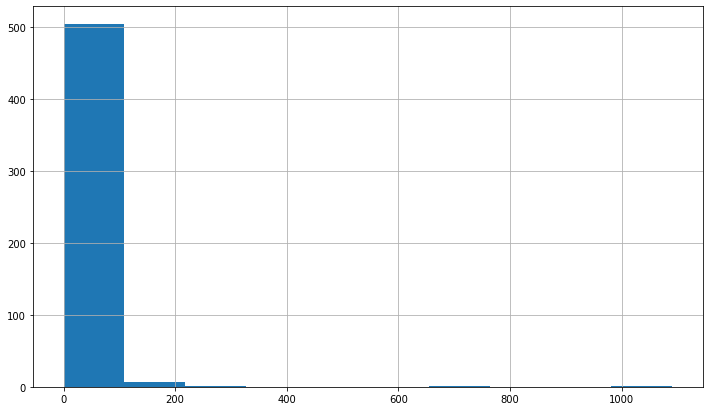

In [6]:
print(f'Skewness of "area" variable: {dataset["area"].skew(): 3f}')
dataset['area'].hist().get_figure().set_size_inches((12, 7))

The `Area` variable has extreme right skewness.

### Part e

New Skewness of "area" variable:  0.962759


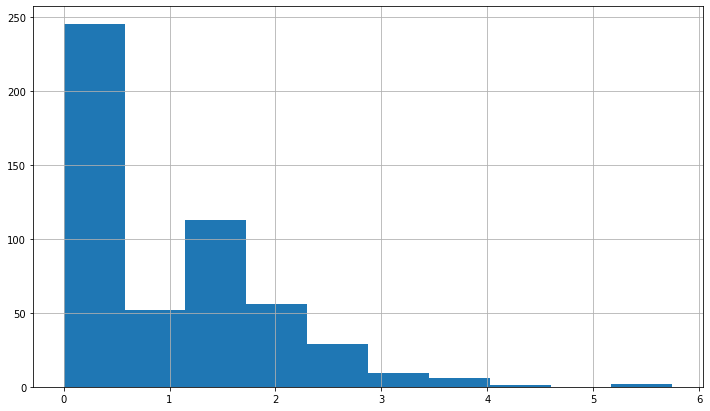

In [7]:
# Raise to the power of 1/4 because it gives a lower skewness than 1/2
dataset.loc[:, 'area'] = np.sqrt(np.sqrt(dataset['area']))
print(f'New Skewness of "area" variable: {dataset["area"].skew(): 3f}')
dataset['area'].hist().get_figure().set_size_inches((12, 7))

### Part f

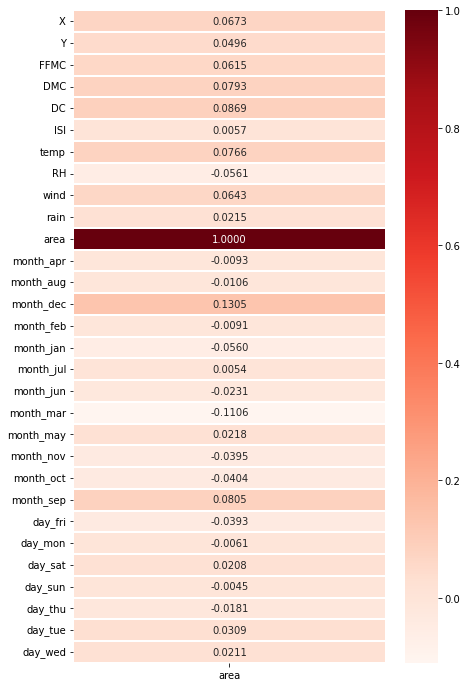

In [8]:
fig, ax = plt.subplots()
sns.heatmap(dataset.corr()[['area']], annot=True, fmt='.4f', cmap='Reds', linewidths=2, yticklabels=dataset.columns)
fig.set_size_inches((7, 12))

We can see that the `area` variable does not have any strong linear correlation with any other feature. Albeit, a relatively stronger correlation is visible with december and september months. Maybe there are more fire breakouts in these months.

## Feature Selection and Linear Regression

### Part g

In [9]:
X_df = dataset.loc[:, dataset.columns != 'area']
Y_df = dataset['area']

### Part h

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_df, Y_df, test_size=0.2)

### Part i

In [11]:
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error
dummy = DummyRegressor(strategy='mean').fit(X_train, Y_train)
dummy_prediction = dummy.predict(X_test)
dummy_Error = mean_squared_error(Y_test, dummy_prediction)
print(f'Dummy\'s MSE: {dummy_Error: .4f}')

Dummy's MSE:  0.8139


### Part j

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
regressor = LinearRegression().fit(X_train, Y_train)
regressor_prediction = regressor.predict(X_test)
regressor_Error = mean_squared_error(Y_test, regressor_prediction)
print(f'Linear Regression\'s MSE: {regressor_Error: .4f}')

Linear Regression's MSE:  0.8809


### Part k

the Dummy regressor has a lower MSE than Linear Regression on average. This Means that a simple baseline model is out-performing the linear regression. As a result of this, the linear regressor does not have any profit to use in this case. 

### Part l

In [13]:
from statsmodels.regression.linear_model import OLS
ols_regressor = OLS(Y_train, X_train)
results = ols_regressor.fit()

In [14]:
results.pvalues.head()

X       0.062961
Y       0.759974
FFMC    0.893909
DMC     0.308968
DC      0.211660
dtype: float64

There seem to be no or very little relation between the `pvalue` and the features' correlation with the target variable, `area` at first glance. we can check further to see if they are a factor of each other.

In [15]:
(results.pvalues / dataset.corr()['area']).head()
#Not a factor of each other

DC        2.434769
DMC       3.894743
FFMC     14.537555
ISI     159.270096
RH      -15.713653
dtype: float64

Maybe they have the same order?

In [16]:
{
    'Presults Order': results.pvalues.sort_values().index,
    'Correlation Order': dataset.corr()['area'].sort_values().index
}

{'Presults Order': Index(['month_dec', 'temp', 'X', 'DC', 'wind', 'DMC', 'month_sep', 'month_nov',
        'month_jan', 'month_apr', 'month_mar', 'month_may', 'month_oct',
        'month_aug', 'Y', 'month_jun', 'day_tue', 'day_mon', 'day_sat',
        'day_sun', 'RH', 'day_wed', 'FFMC', 'ISI', 'month_jul', 'day_thu',
        'day_fri', 'rain', 'month_feb'],
       dtype='object'),
 'Correlation Order': Index(['month_mar', 'RH', 'month_jan', 'month_oct', 'month_nov', 'day_fri',
        'month_jun', 'day_thu', 'month_aug', 'month_apr', 'month_feb',
        'day_mon', 'day_sun', 'month_jul', 'ISI', 'day_sat', 'day_wed', 'rain',
        'month_may', 'day_tue', 'Y', 'FFMC', 'wind', 'X', 'temp', 'DMC',
        'month_sep', 'DC', 'month_dec', 'area'],
       dtype='object')}

Again I don't see Any relation...

### Part m

In [17]:
def backward_elim(X: pd.DataFrame, Y: pd.DataFrame | pd.Series, threshold: float= 0.05) -> list:
    features = X.columns.to_list()
    X = X.copy()
    Y = Y.copy()
    ols_res = OLS(Y, X).fit()
    while any(ols_res.pvalues > threshold):
        features.remove(ols_res.pvalues.idxmax())
        X = X[features]
        ols_res = OLS(Y, X).fit()
    return features

In [18]:
selected_features = backward_elim(X_train, Y_train)
X2_train = X_train[selected_features].copy()
X2_test = X_test[selected_features].copy()
selected_features

['X', 'temp', 'month_dec', 'month_sep']

### Part n

#### h2

I have done every operation(feature selection) on the previous `X_train` because doing ANY selection including feature selection on the test data is WRONG. hence, i will be continuing with previous train and test splits so the results can be compared.

#### j2

In [19]:
regressor = LinearRegression().fit(X2_train, Y_train)
regressor_prediction = regressor.predict(X2_test)
regressor_Error = mean_squared_error(Y_test, regressor_prediction)
print(f'Linear Regression\'s MSE: {regressor_Error: .4f}')

Linear Regression's MSE:  0.9037


#### k2

This time the Linear regression out-performs the dummy regressor.

#### l2

In [20]:
ols_regressor = OLS(Y_train, X2_train)
results = ols_regressor.fit()
results.pvalues

X            5.173230e-03
temp         1.754850e-08
month_dec    9.348793e-06
month_sep    8.180486e-03
dtype: float64

In [21]:
pd.concat((X2_train, Y_train), axis=1).corr()['area']

X            0.103176
temp         0.095059
month_dec    0.141343
month_sep    0.102658
area         1.000000
Name: area, dtype: float64

we can see that the `pvalues` are much closer to the correlation values now.

### Part o

In [22]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1).fit(X2_train, Y_train)
lin_reg = LinearRegression().fit(X2_train, Y_train)
print(f'Ridge Regression MSE: {mean_squared_error(Y_test, ridge_reg.predict(X2_test)): .4f}')
print(f'Linear Regression MSE: {mean_squared_error(Y_test, lin_reg.predict(X2_test)): .4f}')

Ridge Regression MSE:  0.8986
Linear Regression MSE:  0.9037


The only addition of `Ridge` to a normal `Linear Regression` is the $l_2$ regularization. Here, The `Ridge` is trying to further regularize the already hand picked features, so it has a slightly higher error than or in the same range with the normal `Linear Regression`.

### Part p

In [23]:
from sklearn.linear_model import ElasticNet
elastic_reg = ElasticNet(alpha=1).fit(X2_train, Y_train)
ridge_reg = Ridge(alpha=1).fit(X2_train, Y_train)
print(f'ElasticNet Regression MSE: {mean_squared_error(Y_test, elastic_reg.predict(X2_test)): .4f}')
print(f'Ridge Regression MSE: {mean_squared_error(Y_test, ridge_reg.predict(X2_test)): .4f}')

ElasticNet Regression MSE:  0.8142
Ridge Regression MSE:  0.8986


The Elastic Net model uses both $l_1$ and $l_2$ regularization so in general it can be a more stable model than the previous two models. It can be used to automatically select features besides regularizing and doing the linear regression's job.

### Part q

In [24]:
from sklearn.metrics import mean_absolute_error
elastic_reg = ElasticNet(alpha=1).fit(X2_train, Y_train)
ridge_reg = Ridge(alpha=1).fit(X2_train, Y_train)
print(f'ElasticNet Regression MSE: {mean_absolute_error(Y_test, elastic_reg.predict(X2_test)): .4f}')
print(f'Ridge Regression MSE: {mean_absolute_error(Y_test, ridge_reg.predict(X2_test)): .4f}')

ElasticNet Regression MSE:  0.7823
Ridge Regression MSE:  0.7957


I don't see any big difference!

## Model Selection

### Part r

In [40]:
from sklearn.model_selection import KFold, cross_val_score
result = []
for alpha in range(1, 201):
    cv_gen = KFold(n_splits=5, shuffle=True, random_state=1)
    res = cross_val_score(
        estimator=ElasticNet(alpha=alpha),
        X=X_train,
        y=Y_train,
        scoring='neg_mean_squared_error',
        cv=cv_gen
    )
    result.append(res)
result = np.stack(result)
mean_result = np.mean(result, axis=1)

### Part s

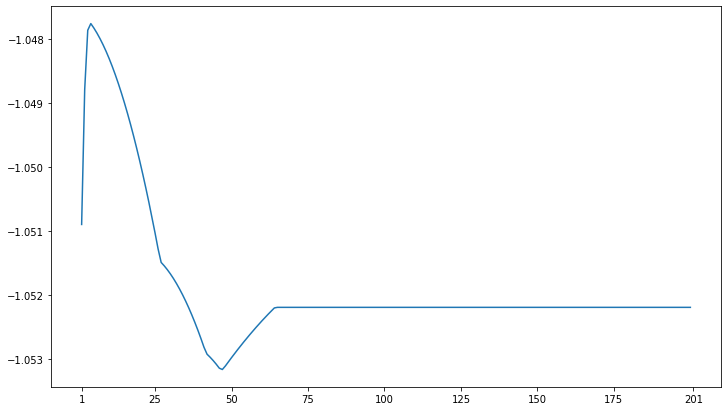

In [54]:
fig, ax = plt.subplots()
ax.plot(
    np.arange(1, 201),
    mean_result
)
ax.set_xticks([1] + np.arange(25, 200, 25).tolist() + [201])
fig.set_size_inches((12, 7))

From Alpha equal to 1 to 10 the Error increases because the model is still unstable. Then the Error starts to decrease as the model parameters start to shrink and the generalization increases. For Alphas around 50 the model has the least Error on the data but then the error starts to increase and stays on a constant number. The reason for this is that for too big alphas, the model decides to not learn and put every weight equal to or around zero to minimize the regularization cost as it has a big coefficient.

The exact minimum Error and the Optimal Alpha:

In [45]:
print(f'Minimum Error is: {mean_result.min():.4f} at: {mean_result.argmin() + 1}')

Minimum Error is: -1.0532 at: 47
